<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tic-Toc-Toe-environment" data-toc-modified-id="Tic-Toc-Toe-environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tic Toc Toe environment</a></span><ul class="toc-item"><li><span><a href="#Initialization-and-attributes" data-toc-modified-id="Initialization-and-attributes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Initialization and attributes</a></span></li><li><span><a href="#Taking-actions" data-toc-modified-id="Taking-actions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Taking actions</a></span></li><li><span><a href="#Reward" data-toc-modified-id="Reward-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Reward</a></span></li></ul></li><li><span><a href="#Optimal-policy-for-Tic-Toc-Toe-environment" data-toc-modified-id="Optimal-policy-for-Tic-Toc-Toe-environment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Optimal policy for Tic Toc Toe environment</a></span><ul class="toc-item"><li><span><a href="#An-example-of-optimal-player-playing-against-random-player" data-toc-modified-id="An-example-of-optimal-player-playing-against-random-player-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>An example of optimal player playing against random player</a></span></li><li><span><a href="#An-example-of-optimal-player-playing-against-optimal-player" data-toc-modified-id="An-example-of-optimal-player-playing-against-optimal-player-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>An example of optimal player playing against optimal player</a></span></li></ul></li><li><span><a href="#Performance-measures" data-toc-modified-id="Performance-measures-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Performance measures</a></span></li></ul></div>

In [1]:
# std
import random
from typing import List, Dict

# imported
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import logging

# customized
from tic_env import TictactoeEnv, OptimalPlayer

# Tic Toc Toe environment

Our 1st game is the famous Tic Toc Toe. You can read about the game and its rules here: https://en.wikipedia.org/wiki/Tic-tac-toe

We implemented the game as an environment in the style of games in the [Python GYM library](https://gym.openai.com/). The commented source code is available in the file "tic_env.py". Here, we give a brief introduction to the environment and how it can be used.

## Initialization and attributes

You can initialize the environment / game as following:

In [2]:
env = TictactoeEnv()

Which then has the following attributes with the corresponding initial values:

In [3]:
env.__dict__

{'grid': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 0,
 'current_player': 'X'}

The game is played by two players: player 'X' and player 'O'. The attribute 'current_player' shows whose turn it is. We assume that player 'X' always plays first.

The attribute 'grid' is a 3x3 numpy array and presents the board in the real game and the state $s_t$ in the reinfocement learning language. Each elements can take a value in {0, 1, -1}:
     0 : place unmarked
     1 : place marked with X 
    -1 : place marked with O 
        
The attribute 'end' shows if the game is over or not, and the attribute 'winner' shows the winner of the game: either "X", "O", or None.  

You can use function 'render' to visualize the current position of the board:

In [4]:
env.render()

|- - -|
|- - -|
|- - -|



## Taking actions

The game environment will recieve action from two players in turn and update the grid. At each time, one player can take the action $a_t$, where $a_t$ can either be an integer between 0 to 8 or a touple, corresponding to the 9 possible.

Function 'step' is used to recieve the action of the player, update the grid:

In [5]:
env.step(2)

(array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 False,
 None)

In [6]:
env.render()

|- - X|
|- - -|
|- - -|



In [7]:
env.__dict__

{'grid': array([[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 1,
 'current_player': 'O'}

In [8]:
env.step((1,1))

(array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 False,
 None)

In [9]:
env.render()

|- - X|
|- O -|
|- - -|



In [10]:
env.__dict__

{'grid': array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 'end': False,
 'winner': None,
 'player2value': {'X': 1, 'O': -1},
 'num_step': 2,
 'current_player': 'X'}

But not all actions are available at each time: One cannot choose a place which has been taken before. There is an error if an unavailable action is taken:

In [11]:
# env.step((0,2))

## Reward

Reward is always 0 until the end of the game. When the game is over, the reward is 1 if you win the game, -1 if you lose, and 0 besides. Function 'observe' can be used after each step to recieve the new state $s_t$, whether the game is over, and the winner, and function 'reward' to get the reward value $r_t$:

In [12]:
env.observe()

(array([[ 0.,  0.,  1.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.]]),
 False,
 None)

In [13]:
env.reward(player='X')

0

In [14]:
env.reward(player='O')

0

An example of finishing the game:

In [15]:
env.step(0)
env.step(3)
env.step(1)

(array([[ 1.,  1.,  1.],
        [-1., -1.,  0.],
        [ 0.,  0.,  0.]]),
 True,
 'X')

In [16]:
env.render()

|X X X|
|O O -|
|- - -|



In [17]:
env.observe()

(array([[ 1.,  1.,  1.],
        [-1., -1.,  0.],
        [ 0.,  0.,  0.]]),
 True,
 'X')

In [18]:
env.reward(player='X')

1

In [19]:
env.reward(player='O')

-1

# Optimal policy for Tic Toc Toe environment

Fortunately, we know the exact optimal policy for Tic Toc Toe. We have implemented and $\epsilon$-greedy version of optimal polciy which you can use for the project.

In [20]:
env.reset();

In [21]:
opt_player = OptimalPlayer(epsilon = 0., player = 'X')

In [22]:
opt_player.act(env.grid)

(0, 0)

In [23]:
opt_player.player

'X'

## An example of optimal player playing against random player

In [24]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt = OptimalPlayer(epsilon=0., player=Turns[0])
    player_rnd = OptimalPlayer(epsilon=1., player=Turns[1])
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt.act(grid)
        else:
            move = player_rnd.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player = ' +  Turns[0])
            print('Random player = ' +  Turns[1])
            env.render()
            env.reset()
            break


-------------------------------------------
Game end, winner is player None
Optimal player = X
Random player = O
|O X O|
|X X O|
|X O X|

-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|X - -|
|O X O|
|- - X|

-------------------------------------------
Game end, winner is player X
Optimal player = X
Random player = O
|X O O|
|- X O|
|X - X|

-------------------------------------------
Game end, winner is player O
Optimal player = O
Random player = X
|O - -|
|X O -|
|X X O|

-------------------------------------------
Game end, winner is player O
Optimal player = O
Random player = X
|O - X|
|X O -|
|X - O|



## An example of optimal player playing against optimal player

In [25]:
Turns = np.array(['X','O'])
for i in range(5):
    env.reset()
    grid, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt_1 = OptimalPlayer(epsilon=0., player=Turns[0])
    player_opt_2 = OptimalPlayer(epsilon=0., player=Turns[1])
    for j in range(9):
        if env.current_player == player_opt.player:
            move = player_opt_1.act(grid)
        else:
            move = player_opt_2.act(grid)

        grid, end, winner = env.step(move, print_grid=False)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player 1 = ' +  Turns[0])
            print('Optimal player 2 = ' +  Turns[1])
            env.render()
            env.reset()
            break


-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Optimal player 2 = X
|O X X|
|X O O|
|X O X|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Optimal player 2 = X
|O X O|
|X X O|
|X O X|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Optimal player 2 = X
|O X X|
|X O O|
|X O X|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = X
Optimal player 2 = O
|X O X|
|O O X|
|X X O|

-------------------------------------------
Game end, winner is player None
Optimal player 1 = O
Optimal player 2 = X
|X O X|
|O O X|
|X X O|



# Performance measures

In [26]:
def run_episode(agent1, agent2, env, switch: bool):
    grid, end, __  = env.observe()
    if switch:
        agent1.player, agent2.player = 'O', 'X'
    else:
        agent1.player, agent2.player = 'X', 'O'
    while end == False:
        if env.current_player == agent1.player:
            move = agent1.act(grid) 
            grid, end, winner = env.step(move, print_grid=False) 
        else:
            move = agent2.act(grid)
            grid, end, winner = env.step(move, print_grid=False) 
    return winner, agent1, agent2

In [27]:
def eval(agent1, agent2, n_episode: int = 500) -> Dict:
    env = TictactoeEnv()
    win, los, draw = 0, 0, 0
    res = []
        
    for episode in tqdm(range(n_episode)):
        env.reset()
        switch = i % 2
        winner, agent1, agent2 = run_episode(agent1, agent2, env, switch)

        if winner == agent1.player:
            win += 1
            res.append(1)
        elif winner == agent2.player:
            los += 1
            res.append(-1)
        else:
            draw += 1
            res.append(0)
    
    res_info = {
        'win': win,
        'los': los,
        'draw': draw,
        'res': res,
        'metric': (win-los)/n_episode, 
        'draw_rate': draw/n_episode
    }
           
    return res_info

In [30]:
metric_dict = {'opt': 0.0, 'rand': 1.0}
for (mode, epsilon) in metric_dict.items():
    player_opt = OptimalPlayer(epsilon=0.)
    player_baseline = OptimalPlayer(epsilon=epsilon)
    res_info = eval(player_opt, player_baseline)
    
    print("# Eval with Opt({})".format(epsilon))
    print('M{} = {}, Draw rate = {}'.format(mode, res_info['metric'], res_info['draw_rate']))

100%|████████████████████████████████████████████████| 500/500 [00:02<00:00, 219.48it/s]


# Eval with Opt(0.0)
Mopt = 0.0, Draw rate = 1.0


100%|████████████████████████████████████████████████| 500/500 [00:01<00:00, 448.57it/s]

# Eval with Opt(1.0)
Mrand = 0.974, Draw rate = 0.026


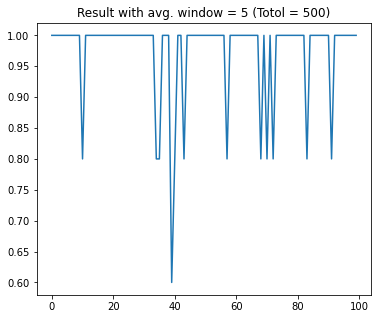

In [31]:
def res_plot(epi_res: List, window: int = 250) -> None:
    results = np.mean(np.array(epi_res).reshape(-1,window), axis=1)
    fig, axes = plt.subplots(figsize=(6, 5))
    axes.plot(results)
    axes.set_title('Result with avg. window = {} (Totol = {})'.format(window, len(epi_res)))
    
epi_res = res_info['res']
res_plot(epi_res, window=5)